# Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data

In [15]:
train = pd.read_csv('fashion-mnist_train.csv')
training = np.array(train, dtype = 'float32')

In [16]:
train.shape

(60000, 785)

In [17]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Cleaning data

In [18]:
train.isnull().sum().sum()

0

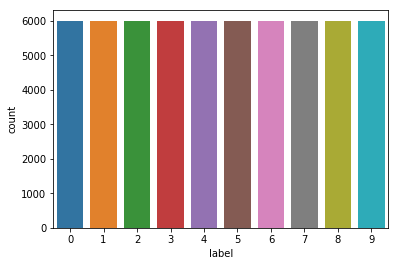

In [19]:
sns.countplot(train['label'])

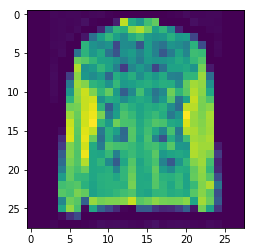

In [20]:
plt.imshow(training[5,1:].reshape((28,28)) ) 

# Transforming data

In [21]:
X = training[:,1:]/255
y = training[:,0] 

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)

X_train = np.resize(X_train, (-1, 28,28,1))
y_train = np.resize(y_train, (-1, 1))
X_test = np.resize(X_test, (-1, 28,28,1))
y_test = np.resize(y_test, (-1, 1))

# Model

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

cnn_model = Sequential()
cnn_model.add(Conv2D(64, 3, 3, input_shape=(28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim=32, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(output_dim=24, activation='relu'))
cnn_model.add(Dense(output_dim=10, activation='sigmoid'))

/opt/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
/opt/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  if sys.path[0] == '':
/opt/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=24)`
  
/opt/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  from ipykernel import kernelapp as app


In [58]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics =['accuracy'])

In [59]:
 cnn_model.fit(X_train, y_train, batch_size = 512, nb_epoch = 50, verbose = 1, validation_data = (X_test, y_test))

/opt/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 50999 samples, validate on 8999 samples
Epoch 1/50
50999/50999 [==============================] - 18s 353us/step - loss: 1.4627 - acc: 0.3645 - val_loss: 0.9373 - val_acc: 0.4942
Epoch 2/50
50999/50999 [==============================] - 17s 340us/step - loss: 0.8493 - acc: 0.6492 - val_loss: 0.5335 - val_acc: 0.7978
Epoch 3/50
50999/50999 [==============================] - 18s 351us/step - loss: 0.6156 - acc: 0.7746 - val_loss: 0.4569 - val_acc: 0.8408
Epoch 4/50
50999/50999 [==============================] - 18s 357us/step - loss: 0.5415 - acc: 0.8069 - val_loss: 0.4118 - val_acc: 0.8593
Epoch 5/50
50999/50999 [==============================] - 19s 374us/step - loss: 0.4948 - acc: 0.8240 - val_loss: 0.4001 - val_acc: 0.8600
Epoch 6/50
50999/50999 [==============================] - 20s 389us/step - loss: 0.4679 - acc: 0.8330 - val_loss: 0.3702 - val_acc: 0.8733
Epoch 7/50
50999/50999 [==============================] - 19s 375us/step - loss: 0.4452 - acc: 0.8423 - val_loss: 0.3

In [60]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

8999/8999 [==============================] - 1s 59us/step
Test Accuracy : 0.913
